# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

>분석단위(지역)의 판매량

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [4]:
data[var].isna().sum()

0

>NaN값이 존재하지 않음

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [5]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

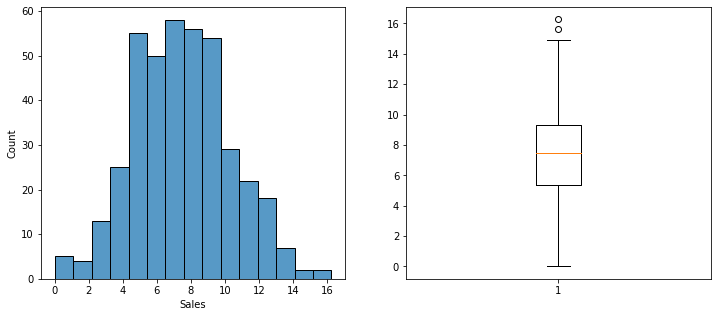

[5.39 0.  ]
[ 9.32 14.9 ]


In [6]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins = 15)

plt.subplot(1, 2, 2)
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 400개의 지역에서 전혀 팔리지 않는 곳부터 16000개가 팔리는 지역까지 다양하게 있고<br>
평균적으로는 약 7500개정도 팔리고 있음

8) 추가 분석해 볼 사항이 있나요?

>대략 4.2부터 9.8 까지를 기준으로 좌우로 3부분으로 나눌 수 있는데 그 차이를 만드는 이유에 대해서 분석 해봐야 한다고 생각함

### ② CompPrice

In [7]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

>경쟁사의 가격

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [9]:
data[var].isna().sum()

0

>NaN 존재 안함

4) 가변수화 필요 여부

>필요 없음

5) 기초통계량(수치화)

In [10]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

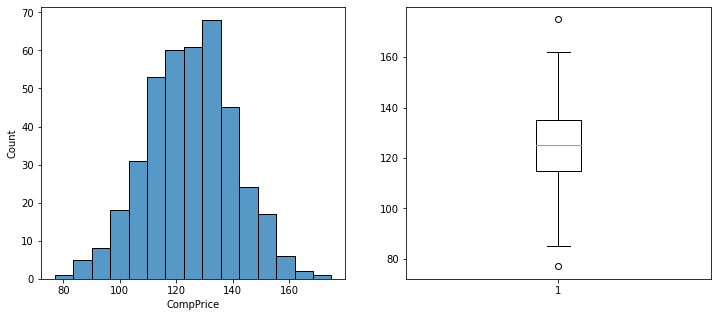

[115.  85.]
[135. 162.]


In [11]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins = 15)

plt.subplot(1, 2, 2)
box = plt.boxplot(data[var])

plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 경쟁사의 제품은 77달러부터 시작해서 최대 175달러까지 판매하고 있고<br>
평균적으로는 124달러에 판매하고 있음

8) 추가 분석해 볼 사항이 있나요?

> 자사 제품의 라인업과 비교해서 분석해 봐야함

### ③ Income

In [12]:
var = 'Income'

1) 변수의 비즈니스 의미

>분석단위(지역)의 평균 소득

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [14]:
data[var].isna().sum()

0

>NaN 존재 안함

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [15]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

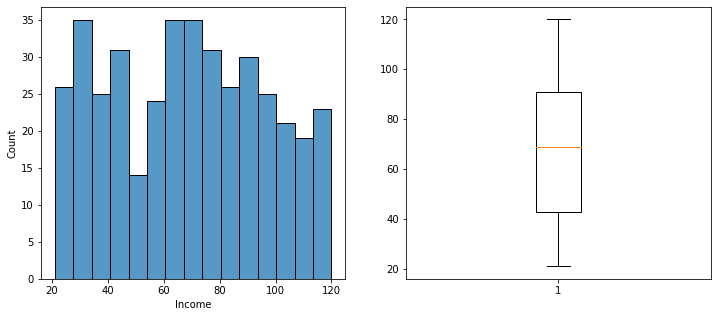

[42.75 21.  ]
[ 91. 120.]


In [17]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins = 15)

plt.subplot(1, 2, 2)
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>지역들의 평균소득은 최소 21000달러부터 최대 120000달러까지 존재하고 있으며
 전체 평균 소득은 약 6900달러임

8) 추가 분석해 볼 사항이 있나요?

> 지역의 평균 소득과 자사 제품의 가격대와 비교해서 소득별 평균 가격대와 판매량간의 연관관계를 분석해봐야함

### ④ Advertising

In [8]:
var = 'Advertising'

1) 변수의 비즈니스 의미

> 분석단위(지역)당 광고 예산

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [9]:
data[var].isna().sum()

0

> NaN 값 존재 안함

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [10]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

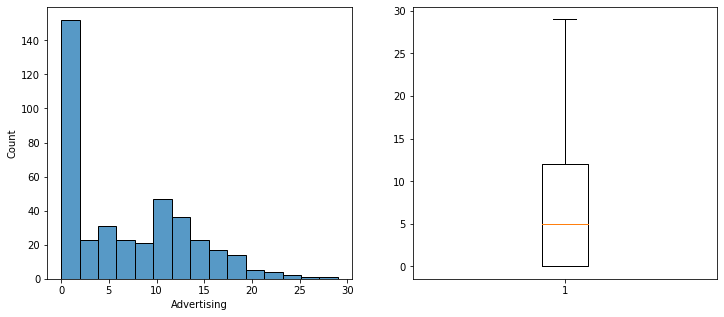

[0. 0.]
[12. 29.]


In [11]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins = 15)
plt.subplot(1, 2, 2)
box = plt.boxplot(data[var])

plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 브랜드 상품의 홍보를 위한 예산이 아예 없는 지역이 25%이상 존재하고 전체의 50%는 5000달러 미만을 사용함

8) 추가 분석해 볼 사항이 있나요?

>홍보에 예산을 전혀 쓰지 않는 지역과 다른지역과의 판매량 차이를 분석해 볼 가치가 있음

### ⑤ Population

In [12]:
var = 'Population'

1) 변수의 비즈니스 의미

>분석단위(지역)의 인구수 (단위 : 1000)

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [13]:
data[var].isna().sum()

0

> NaN값 존재 안함

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [14]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

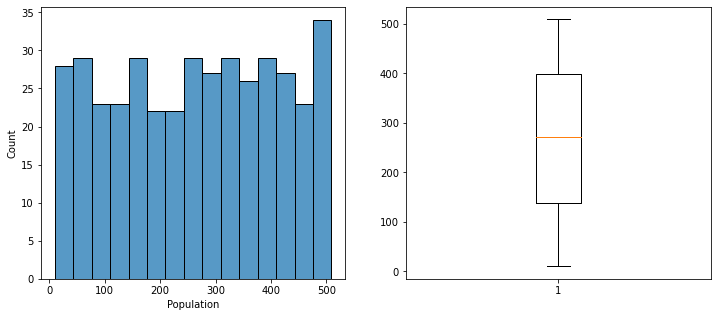

[139.  10.]
[398.5 509. ]


In [15]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins = 15)

plt.subplot(1, 2, 2)
box = plt.boxplot(data[var])

plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 진출해있는 지역중 최소 지역인구는 만명이고, 최대 지역인구는 약 50.9만명 정도임
평균적으로 한 지역당 인구는 약 26.5만명 정도임

8) 추가 분석해 볼 사항이 있나요?

> 지역의 인구수별 판매량을 조사해서 인구수가 많은데도 판매량이 적은 곳이 있다면 왜 그런지 분석 해봐야함

### ⑥ Price

In [16]:
var = 'Price'

1) 변수의 비즈니스 의미

>분석 단위(지역)에서의 판매 가격

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [17]:
data[var].isna().sum()

0

>NaN값 존재 안함

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [18]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

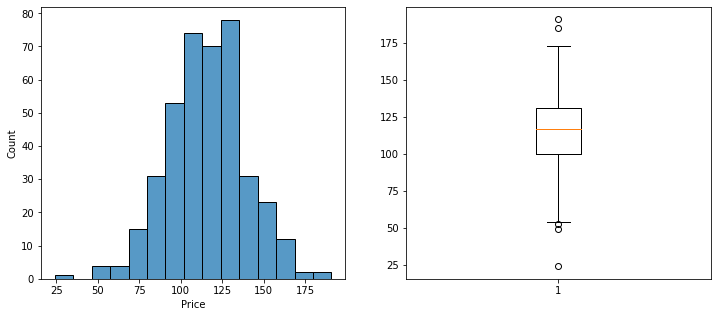

[100.  54.]
[131. 173.]


In [29]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins= 15)

plt.subplot(1, 2, 2)
box = plt.boxplot(data[var])

plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 지역에서 상품가격은 최소 24달러부터 최대 191달러까지 존재하고 평균적으로는 116달러정도임<br>
지역마다 가격 편차라 너무 크다고 판단됨

8) 추가 분석해 볼 사항이 있나요?

> 지역의 상품가격과 평균소득의 관계를 파악해서 분석해서, 관계가 평균적인 곳과 다른 지역이 있다면 개선해야함

### ⑦ ShelveLoc

In [19]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

>상품의 진열 상태

2) 숫자, 범주?

>범주

3) NaN 존재 유무 및 조치방안

In [20]:
data[var].isna().sum()

0

>NaN값 존재 안함

4) 가변수화 필요 여부

In [21]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

>Bad, Good, Medium으로 되어있음<br>
가변수화 필요함

5) 기초통계량(수치화)

In [22]:
print(data[var].value_counts())
print(data[var].value_counts()/len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

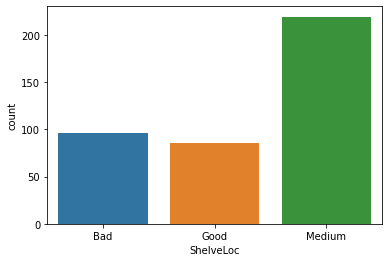

In [23]:
sns.countplot(x = var, data = data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 진열 상태가 보통인 곳이 219곳(54.75%)으로 가장 많았고 안좋은 곳이 96곳(24.00%) 좋은곳이 85곳(21.25%)임<br>
진열상태가 좋지않은곳이 24퍼센트나 존재함

8) 추가 분석해 볼 사항이 있나요?

> 진열상태가 좋을 수록 구매 욕구가 올라가는게 보편적 생각이지만, 실제로 그러한지는 나쁜곳과 좋은곳의 상품 판매량을 비교해봐야함<br>
유의미한 결과가 있다면 상품 진열이 나쁜곳을 적극적으로 개선해야함

### ⑧ Age

In [56]:
var = 'Age'

1) 변수의 비즈니스 의미

>분석단위(지역)의 평균 나이

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [57]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

>가변수화 필요 없음

5) 기초통계량(수치화)

In [58]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

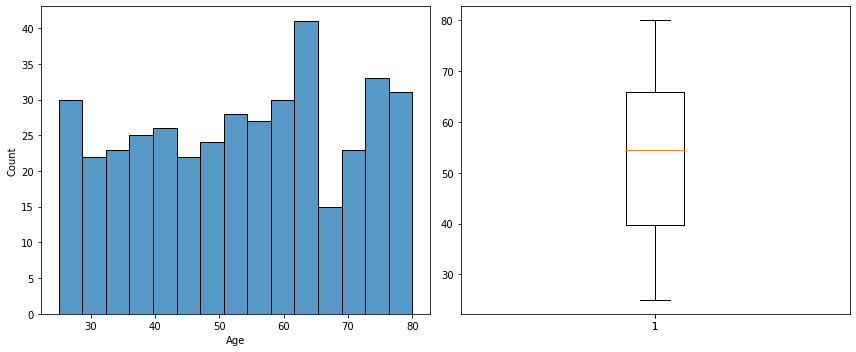

[39.75 25.  ]
[66. 80.]


In [95]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[var], bins = 15)

plt.subplot(1, 2, 2)
box = plt.boxplot(data[var], vert = True)
plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 지역의 평균나이가 최소인곳은 25살이고 최고인곳은 80세임<br>
보통 카시트를 사는 부모의 나이대를 생각해 봤을때 구매력이 떨어지는 지역이 많음

8) 추가 분석해 볼 사항이 있나요?

> 실질적으로 아이가 카시트를 타는 아이를 가진 부모의 나이대보다 높은 지역을 따로 분석해서 <br>
판매량이 심각하게 낮다면 점포 정리를 생각 해봐야함

### ⑨ Urban

In [44]:
var = 'Urban'

1) 변수의 비즈니스 의미

>분석단위(지역)의 도심지역 여부

2) 숫자, 범주?

>범주

3) NaN 존재 유무 및 조치방안

In [45]:
data[var].isna().sum()

0

> NaN값 존재 안함

4) 가변수화 필요 여부

>yes, no 로 되어있음 가변수화 필요

5) 기초통계량(수치화)

In [47]:
print(data[var].value_counts())
print(data[var].value_counts() / len(data[var]))

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

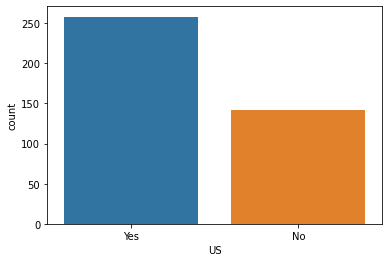

In [52]:
sns.countplot(x = var, data = data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 이 브랜드의 매장은 도시에 282곳(약 70%) 도시가 아닌곳이 118곳(약 30%)의 비율로 분포하고 있음

8) 추가 분석해 볼 사항이 있나요?

>도시에 사람이 많아서 카시트가 많이 팔릴 것 같지만 도시에서는 대중교통을 이용할 수 있기 때문에<br>
이동할때 항상 개인 자가용을 사용해야 하는 시골보다 카 시트의 평균 구매율이 떨어질 수도 있음.<br>
그 부분을 분석해 볼만하다고 생각함

### ⑩ US

In [49]:
var = 'US'

1) 변수의 비즈니스 의미

> 분석단위(지역)이 미국 내에 존재하는가

2) 숫자, 범주?

>범주

3) NaN 존재 유무 및 조치방안

In [50]:
data[var].isna().sum()

0

>NaN값 존재 안함

4) 가변수화 필요 여부

> yes, no로 되어있음 가변수화 필요

5) 기초통계량(수치화)

In [51]:
print(data[var].value_counts())
print(data[var].value_counts() / len(data[var]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

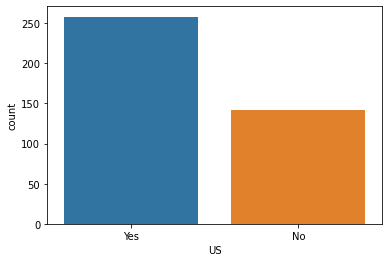

In [53]:
sns.countplot(x = var, data = data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 이 브랜드의 매장은 미국 내에 258곳(65.5%) 해외에 142곳(35.5%) 존재함

8) 추가 분석해 볼 사항이 있나요?

> 미국 뿐만 아니라 해외에 있는 점포의 평균 판매량과 미국의 점포의 평균 판매량을 분석해야함<br>
만약 점포당 평균이 해외와 미국내간의 차이가 크다면, 그 이유가 브랜드의 홍보예산과 연결지어 분석 해 볼수도 있고, 
그 나라의 경쟁 카시트 회사의 평균 가격대등과 연결지어 생각해 볼 수 있음